### 📊 Visualization A/B test result 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [4]:
# Load cleaned dataset
df = pd.read_csv("../data/processed/insurance_data_cleaned.csv")

# Load test results
with open("../metrics/hypothesis_test_results.json") as f:
    results = json.load(f)

C:\Users\hp\AppData\Local\Temp\ipykernel_15020\3431469768.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/insurance_data_cleaned.csv")


In [5]:
# Recompute metrics to ensure they're in the dataframe
df['ClaimOccurred'] = df['TotalClaims'] > 0
df['ClaimFrequency'] = df.groupby('PolicyID')['ClaimOccurred'].transform('max')
df['ClaimSeverity'] = df['TotalClaims'].where(df['ClaimOccurred'], 0)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

In [6]:
# Set styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [7]:
# Helper function to generate boxplots for t-test metrics
def plot_boxplot(df, group_col, metric_col, title):
    sns.boxplot(data=df, x=group_col, y=metric_col)
    plt.title(title)
    plt.xlabel(group_col)
    plt.ylabel(metric_col)
    plt.show()

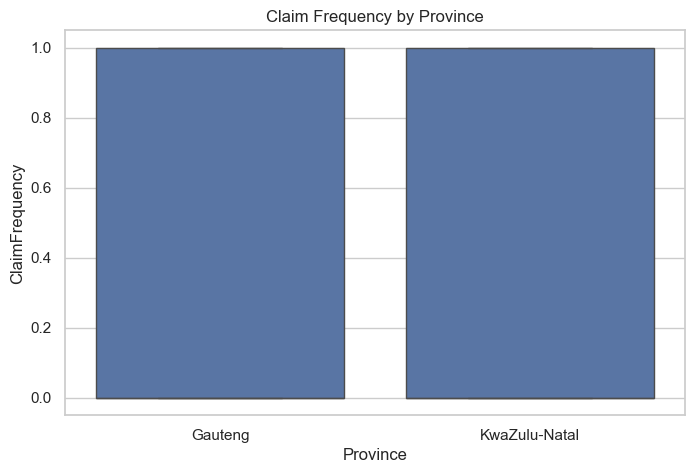

In [8]:
# ClaimFrequency by Province
plot_boxplot(df[df['Province'].isin(['Gauteng', 'KwaZulu-Natal'])],
             'Province', 'ClaimFrequency', 'Claim Frequency by Province')

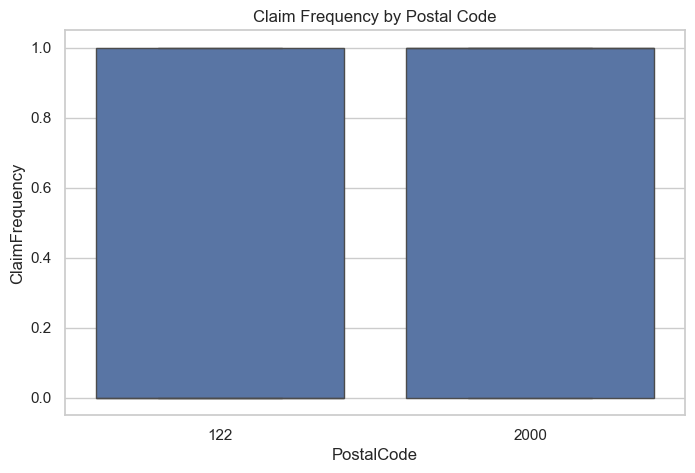

In [9]:
# ClaimFrequency by PostalCode
plot_boxplot(df[df['PostalCode'].isin([2000, 122])],
             'PostalCode', 'ClaimFrequency', 'Claim Frequency by Postal Code')

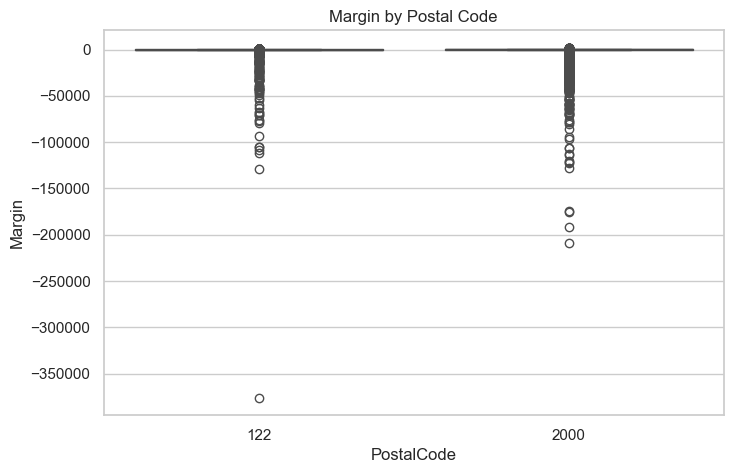

In [11]:
# Margin by PostalCode
plot_boxplot(df[df['PostalCode'].isin([2000, 122])],
             'PostalCode', 'Margin', 'Margin by Postal Code')

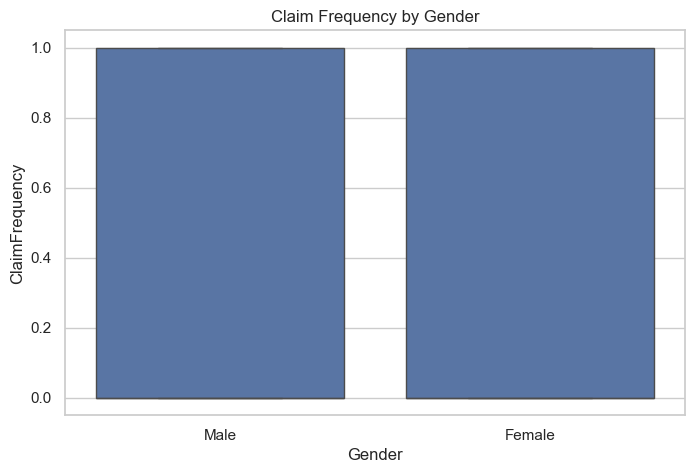

In [12]:
# ClaimFrequency by Gender
plot_boxplot(df[df['Gender'].isin(['Male', 'Female'])],
             'Gender', 'ClaimFrequency', 'Claim Frequency by Gender')

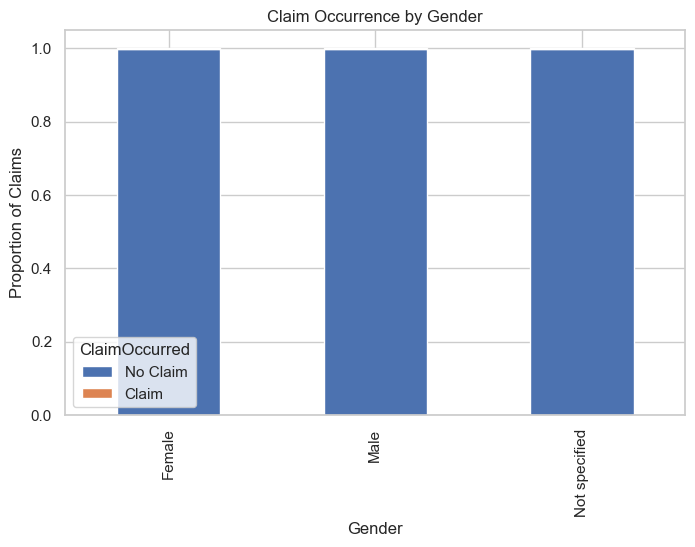

In [13]:
# ClaimOccurred by Gender (Bar plot for chi-squared test)
gender_claims = pd.crosstab(df['Gender'], df['ClaimOccurred'], normalize='index')
gender_claims.plot(kind='bar', stacked=True)
plt.title('Claim Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Claims')
plt.legend(title='ClaimOccurred', labels=['No Claim', 'Claim'])
plt.show()